In [1]:
from pathlib import Path
from math import sqrt,sin
fichero= Path("./") / "inicial.dat"
print(str(fichero))
N_par=100
with fichero.open('wt') as f:
    for i in range(N_par):
        M=1.0
        x=N_par*i + 10
        y=68*sqrt(i) + 13
        z=N_par*sin(6.28*i/N_par)+18
        vx=i/(10*N_par)
        vy=vx
        vz=vx
        print(M,x,y,z,vx,vy,vz,file=f)
print("done")

inicial.dat
done


En esta sesion hemos revisado la practica larga, basandonos en el fichero planetasJIT2.py. Esta es una variante basada en compilador, diferente de la que hicimos la semana anterior, que estaba basada en numpy, pero esencialmente con el mismo contenido.

Primero hemos tenido que crear un fichero de input.

En el ejecutable .py hay que observar:

- la lectura de fichero, lineas 30-31 para determinar el tamaño de los array y luego lineas 38-44 para leer los planetas
- el añadido, linea 12 y 18-20, de la lectura de un parametro, N_secs
- al almacenamiento de los datos a dibujar, lineas 61-65, y de los comandos de dibujo. 68 a 79. Notese como un dibujo esta fuera del bucle, otro dentro. Y notese tambien el uso de savefig, show y close
- finalmente, la forma de seleccionar, linea 62 y 63, los datos de los primeros planetas.





['planetasJIT2.py', '30']
#     t        T           V             E_t 

secs= 0


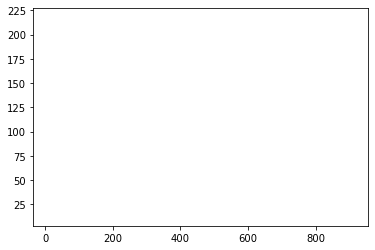

secs= 10


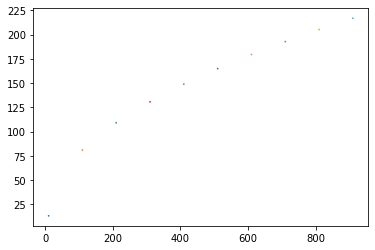

secs= 20


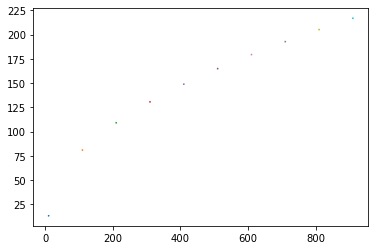

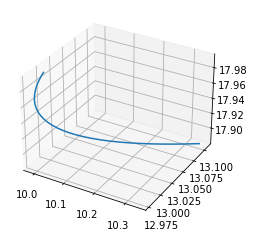

In [2]:
%run planetasJIT2.py 30

La forma de seleccionar los primeros 10 planetoides es el caso mas sencillo del uso de slices, segmentos de listas o de arrays. Veamos unos cuantos

In [3]:
list(range(3,10))+list(range(10,20))

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [4]:
a=list(range(-5,10))
a

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
a[3:5]

[-2, -1]

In [6]:
a[0:8]

[-5, -4, -3, -2, -1, 0, 1, 2]

In [7]:
a[:8]

[-5, -4, -3, -2, -1, 0, 1, 2]

In [8]:
a[2:]

[-3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
a[2:-3]

[-3, -2, -1, 0, 1, 2, 3, 4, 5, 6]

In [10]:
a

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
a[-3:-1]

[7, 8]

In [12]:
a[-3:]

[7, 8, 9]

In [13]:
a[3::4]

[-2, 2, 6]

In [14]:
a[[3,4,5]]

TypeError: list indices must be integers or slices, not list

In [15]:
import numpy as np
b=np.array(a)
b

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [16]:
b[[3,4,5]]

array([-2, -1,  0])

Muchos lenguajes han implementado estos años las operaciones map, reduce y filter, para aplicar operaciones sobre listas de longitud indefinida. Estas operaciones se pueden entonces realizar sin usar memoria, paralelizar al aplicarse a multiples segmentos a la vez, y en general usarse para componer algoritmos para big data. Python no las implementa y prefiere las "comprehension", que sustituyen a map y a filter

In [17]:
[n for i,n in enumerate(a) if i in {3,4,5}] 

[-2, -1, 0]

In [31]:
a=[1,2,3,4,5,6]
a[3],a[3:4]

(4, [4])

La slice de python tiene un aspecto mas potente, y confuso, que las de numpy: admite inserciones

In [32]:
a[3]=[1,2,3]
print(a, "tiene longitud", len(a))

[1, 2, 3, [1, 2, 3], 5, 6] tiene longitud 6


In [33]:
a[3:4]=[1,2,3]
a

[1, 2, 3, 1, 2, 3, 5, 6]

In [34]:
len(a)

8

In [35]:
a[2:4]=[]
a

[1, 2, 2, 3, 5, 6]

In [36]:
a[2:4]=[3,4,5,7,8,9,0,23]
a

[1, 2, 3, 4, 5, 7, 8, 9, 0, 23, 5, 6]

Podemos usar las slices para generar una criba de primos que no necesite los bucles ni moderno

            for j in range(i,n,i): 
                a[j]=False

ni tradicional 

            j=i+i
            while j < n:
                a[j]=False
                j=j+i
            
Lo que permite ganar velocidad al ocultar un bucle dentro del mecanismo del interprete




In [38]:
def criba(n):
    """buscar numeros primos hasta 'n'."""
    a = [False] * 2 + [True] * (n-2) #inicializa una lista de elementos True y False  
    for i in range(int(len(a)**0.5+1)):
        if a[i]:
            a[i*i:n:i]= [False]*len(range(i*i,n,i)) 
    return (j for (j,k) in enumerate(a) if k == True)

primos=criba(1000)
print(primos)

<generator object criba.<locals>.<genexpr> at 0x7f313bdae350>


Para terminar la sesion de hoy, vamos a hacer un caso de uso node aunque no sea aparente a primera vista, necesitamos vectores de 512 componentes, y por tanto es una ventaja pivotar sobre numpy

In [39]:
!pip install sentence-transformers

In [40]:
food="bread,butter,egg,meat,honey,hunger,kettle,oil".split(",")
comida="pan,mantequilla,huevo,carne,miel,hambre,tetera,aceite".split(",")
pares="rey,reina,hombre,mujer,macho,hembra,juez,jueza".split(",")
pairs="king,queen,man,woman,male,female,judge".split(",")
dias="Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Domingo".split(",")
days="Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday".split(",")
import numpy as np
import matplotlib.pyplot as plt
def similPlot(a,b,dist):
    simMatrix=np.zeros((len(a),len(b)))
    for ifila, fila in enumerate(a):
        for icol, col in enumerate(b):
            simMatrix[ifila,icol]=dist(fila,col)

    plt.matshow(simMatrix,cmap=plt.cm.binary)
    plt.xticks(range(len(b)),[x.split(':')[-1] for x in b],rotation='vertical')
    plt.yticks(range(len(a)),[x.split(':')[-1] for x in a])
    plt.show()

In [41]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v1')
model.encode("Mantequilla")

array([ 0.03176333, -0.05141505, -0.08102799, -0.01247521, -0.03362278,
        0.04140732,  0.01394114, -0.03299249, -0.04488968, -0.0190968 ,
       -0.03915671,  0.01404256,  0.05491221,  0.00734152, -0.02340702,
        0.00294748,  0.00024669,  0.03946094,  0.02649238, -0.00895826,
       -0.03674312,  0.01301694, -0.05432911, -0.00747709,  0.04398435,
       -0.00608752, -0.01540581,  0.00955895, -0.00411354,  0.06122407,
        0.00040108,  0.05259474,  0.04156153, -0.04301704, -0.03268301,
       -0.02299014, -0.05174865, -0.0624793 , -0.0116713 , -0.03090715,
       -0.03060619, -0.01047862,  0.00360948, -0.01618793,  0.00737432,
       -0.03516795, -0.07113902,  0.01839087,  0.02964955, -0.01850347,
       -0.07558022, -0.02590558, -0.04069986, -0.01403785,  0.01736962,
        0.00700147, -0.06137095,  0.02398673, -0.00085539,  0.04187589,
       -0.01264741,  0.1066487 , -0.00793561,  0.03366403, -0.04879221,
       -0.01855713,  0.00753434,  0.08440899,  0.04831472, -0.01

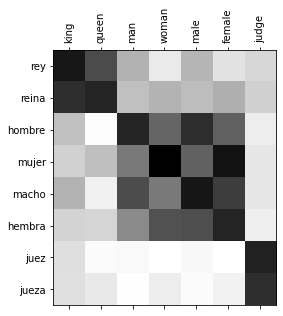

In [42]:
def dist(a,b):
    e=model.encode([a,b])
    return util.pytorch_cos_sim(e[0],e[1])
similPlot(pares,pairs,dist)

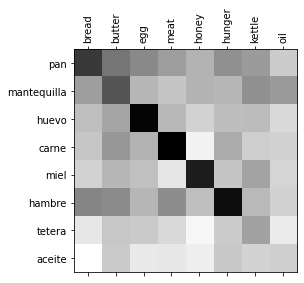

In [43]:
similPlot(comida,food,dist)

In [44]:
rey=model.encode("rey")
reina=model.encode("reina")
hombre=model.encode("hombre")
mujer=model.encode("mujer")

In [45]:
sum(rey * reina)

0.8592349780284678

In [46]:
sum(rey * hombre)

0.45977221926477796

In [47]:
#notad que este sistema nos esta dando vectores sin normalizar a uno:
sum(rey * rey)

0.9655352527800636

In [48]:
np.dot(rey,hombre)

0.45977223

In [49]:
np.inner(rey,hombre)

0.45977223

In [50]:
trad=model.encode(["king","queen","man"])

In [51]:
trad.shape

(3, 512)

In [52]:
np.dot(rey,trad)

ValueError: shapes (512,) and (3,512) not aligned: 512 (dim 0) != 3 (dim 0)

In [53]:
np.inner(rey,trad)

array([0.90708464, 0.7466309 , 0.52514005], dtype=float32)

In [54]:
np.dot(rey,trad.T)

array([0.90708464, 0.7466309 , 0.52514005], dtype=float32)

In [55]:
temas=model.encode(["mecanica cuantica", "teoria cuantica de campos", "salir a dar un paseo", "sacar al perro"])

In [57]:
temas.shape

(4, 512)

In [58]:
np.inner(temas,temas)

array([[0.82765853, 0.43546334, 0.01802626, 0.02233724],
       [0.43546334, 0.9443814 , 0.02283192, 0.00991153],
       [0.01802626, 0.02283192, 0.8857111 , 0.4696622 ],
       [0.02233724, 0.00991153, 0.4696622 , 0.80145127]], dtype=float32)

In [59]:
len(temas)

4

In [62]:
#ejercicio: buscar otras formas de escribir este bucle
for i in range(len(temas)):
    temas[i]= temas[i]/ sqrt(temas[i] @ temas[i])

In [63]:
np.inner(temas,temas)

array([[0.99999976, 0.4925521 , 0.02105396, 0.02742617],
       [0.4925521 , 0.9999998 , 0.02496449, 0.01139273],
       [0.02105396, 0.02496449, 1.0000002 , 0.5574436 ],
       [0.02742617, 0.01139273, 0.5574436 , 0.9999999 ]], dtype=float32)